In [5]:
from abc import ABC, abstractmethod
from typing import Iterable

import numpy as np
import matplotlib.pyplot as plt

In [24]:
class Cell(ABC):

    @abstractmethod
    def get_reward(self) -> float:
        pass

    def is_steppable(self) -> bool:
        return True

    def is_terminal(self) -> bool:
        return False

    def has_value(self) -> bool:
        return True

In [49]:
class RegularCell(Cell):

    def __init__(self, reward: float):
        self.reward = reward

    def get_reward(self) -> float:
        return self.reward


class TerminalCell(Cell):

    def __init__(self, reward: float):
        self.reward = reward

    def get_reward(self) -> float:
        return self.reward

    def is_terminal(self) -> bool:
        return True

    def has_value(self) -> bool:
        return False


class WallCell(Cell):

    def get_reward(self) -> float:
        return 0

    def is_steppable(self) -> bool:
        return False

    def has_value(self) -> bool:
        return False

In [50]:
class Board:

    @staticmethod
    def process_cells(cells: list[list[Cell]]):
        cells = [list(row) for row in cells] if cells else []
        if not cells:
            raise Exception("Number of rows in a board must be at least one.")
        if not cells[0]:
            raise Exception("There has to be at least one column.")
        rows_no = len(cells)
        cols_no = len(cells[0])
        for row in cells:
            if not row or len(row) != cols_no:
                raise Exception(
                    "Each row in a a board must have the same number of columns. ")
        return rows_no, cols_no, cells

    def process_pos(self, pos):
        r, c = pos
        if r < 0 or r >= self.rows_no:
            raise Exception("Invalid row position.")
        if c < 0 or c >= self.cols_no:
            raise Exception("Invalid column position.")
        if not cells[r][c].is_steppable():
            raise Exception("Invalid position: unsteppable cell.")
        return r, c
    
    def __init__(self, cells: Iterable[Iterable[Cell]], pos: tuple[int, int]):
        rows_no, cols_no, cells = Board.process_cells(cells)
        self.cells = cells
        self.rows_no = rows_no
        self.cols_no = cols_no
        r, c = self.process_pos(pos)
        self.row = r
        self.col = c

    def __getitem__(self, key: tuple[int, int]) -> Cell:
        r, c = key
        return self.cells[r][c]

In [51]:
def int_to_cell(code: int) -> Cell:
    if code == 0:
        return RegularCell(-1)
    elif code == 1:
        return RegularCell(-10)
    elif code == 2:
        return WallCell()
    elif code == 3:
        return TerminalCell(-1)

In [52]:
cell_codes = np.random.choice(4, size=(8, 8), p=[0.7, 0.1, 0.1, 0.1])
print(cell_codes)

[[0 0 2 0 3 3 0 0]
 [0 0 0 0 0 1 0 3]
 [0 2 0 0 0 2 0 0]
 [0 3 2 2 0 0 3 0]
 [0 0 0 3 1 3 0 2]
 [3 0 2 0 0 1 1 0]
 [0 0 2 0 0 0 0 0]
 [0 0 3 2 0 0 2 0]]


In [53]:
def draw_board(board: Board):
    board_img = np.ones(shape=(board.rows_no, board.cols_no, 3), dtype=np.uint8)    
    for i in range(board.rows_no):
        for j in range(board.cols_no):
            if isinstance(board[i, j], RegularCell):
                if board[i, j].get_reward() == -1:
                    board_img[i, j, :] = [255, 255, 255]
                else:
                    board_img[i, j, :] = [255, 0, 0]
            elif isinstance(board[i, j], WallCell):
                board_img[i, j, :] = [0, 0, 0]
            else:
                board_img[i, j, :] = [0, 0, 255]
        plt.imshow(board_img)

In [54]:
cells = [[int_to_cell(cell_codes[i, j]) for i in range(cell_codes.shape[0])] for j in range(cell_codes.shape[1])]

In [59]:
board = Board(cells, (0, 0))
cells

[[<__main__.RegularCell at 0x124361150>,

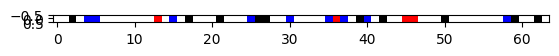

In [56]:
draw_board(board)